In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('fast')

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('data.csv', encoding = "ISO-8859-1", engine='python')

Using TensorFlow backend.


In [3]:
df.shape

(95839, 35)

In [4]:
df.count()

FECHA_ACTUALIZACION    95839
ID_REGISTRO            95839
ORIGEN                 95839
SECTOR                 95839
ENTIDAD_UM             95839
SEXO                   95839
ENTIDAD_NAC            95839
ENTIDAD_RES            95839
MUNICIPIO_RES          95839
TIPO_PACIENTE          95839
FECHA_INGRESO          95839
FECHA_SINTOMAS         95839
FECHA_DEF              95839
INTUBADO               95839
NEUMONIA               95839
EDAD                   95839
NACIONALIDAD           95839
EMBARAZO               95839
HABLA_LENGUA_INDIG     95839
DIABETES               95839
EPOC                   95839
ASMA                   95839
INMUSUPR               95839
HIPERTENSION           95839
OTRA_COM               95839
CARDIOVASCULAR         95839
OBESIDAD               95839
RENAL_CRONICA          95839
TABAQUISMO             95839
OTRO_CASO              95839
RESULTADO              95839
MIGRANTE               95839
PAIS_NACIONALIDAD      95839
PAIS_ORIGEN            95839
UCI           

In [6]:
df.SEXO

0        1
1        1
2        2
3        2
4        2
        ..
87367    2
87368    1
87369    2
87370    2
87371    2
Name: SEXO, Length: 87372, dtype: int64

In [5]:
df.groupby('SEXO').size()

SEXO
1    47119
2    48720
dtype: int64

In [7]:
d = {1:'M', 2:'H'}
df['SEXO']= df['SEXO'].apply(lambda x:d[x])
df['SEXO'].head()

0    H
1    M
2    H
3    H
4    M
Name: SEXO, dtype: object

In [6]:
df.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-03,134d54,1,4,17,2,17,17,6,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
1,2020-05-03,05f125,1,4,9,1,9,9,15,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
2,2020-05-03,0d2268,1,4,2,2,25,2,2,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
3,2020-05-03,063132,1,4,9,2,9,9,15,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
4,2020-05-03,0c0bda,1,12,14,1,14,14,39,2,...,2,2,2,2,2,2,99,MÃ©xico,99,2


In [10]:
df.drop(['PAIS_ORIGEN', 'MIGRANTE', 'PAIS_NACIONALIDAD'],1)

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
0,2020-04-30,09e8dc,2,9,15,M,15,15,37,2,...,2,2,2,2,2,2,2,2,1,1
1,2020-04-30,1dd782,2,12,9,M,15,9,3,1,...,2,2,2,2,1,2,2,2,2,97
2,2020-04-30,05d4f9,1,12,14,H,14,14,48,1,...,2,2,2,2,2,2,2,1,3,97
3,2020-04-30,0efbaf,2,9,28,H,16,28,32,1,...,2,2,2,2,2,2,2,1,1,97
4,2020-04-30,013a6c,1,3,15,H,15,15,106,1,...,2,2,2,2,1,2,2,1,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87367,2020-04-30,15f100,1,12,5,H,5,5,18,1,...,2,1,2,2,2,2,2,1,2,97
87368,2020-04-30,058723,1,12,9,M,9,9,3,1,...,2,2,2,2,1,2,2,1,2,97
87369,2020-04-30,1475fb,2,12,9,H,21,15,13,1,...,2,2,2,2,2,2,2,1,2,97
87370,2020-04-30,18ff4c,1,12,9,H,9,9,13,1,...,2,2,2,2,2,2,2,1,3,97


In [11]:
df.groupby('RESULTADO').size()

RESULTADO
1    19224
2    52628
3    15520
dtype: int64

In [12]:
df.count()

FECHA_ACTUALIZACION    87372
ID_REGISTRO            87372
ORIGEN                 87372
SECTOR                 87372
ENTIDAD_UM             87372
SEXO                   87372
ENTIDAD_NAC            87372
ENTIDAD_RES            87372
MUNICIPIO_RES          87372
TIPO_PACIENTE          87372
FECHA_INGRESO          87372
FECHA_SINTOMAS         87372
FECHA_DEF              87372
INTUBADO               87372
NEUMONIA               87372
EDAD                   87372
NACIONALIDAD           87372
EMBARAZO               87372
HABLA_LENGUA_INDIG     87372
DIABETES               87372
EPOC                   87372
ASMA                   87372
INMUSUPR               87372
HIPERTENSION           87372
OTRA_COM               87372
CARDIOVASCULAR         87372
OBESIDAD               87372
RENAL_CRONICA          87372
TABAQUISMO             87372
OTRO_CASO              87372
RESULTADO              87372
MIGRANTE               87372
PAIS_NACIONALIDAD      87372
PAIS_ORIGEN            87372
UCI           

In [8]:
df = df.drop(['PAIS_ORIGEN', 'MIGRANTE', 'PAIS_NACIONALIDAD', 'HABLA_LENGUA_INDIG', 'NACIONALIDAD'],1)

In [9]:
df

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,INMUSUPR,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,UCI
0,2020-05-03,134d54,1,4,17,H,17,17,6,1,...,2,2,2,2,2,2,2,99,1,97
1,2020-05-03,05f125,1,4,9,M,9,9,15,1,...,2,2,2,2,2,2,2,99,1,97
2,2020-05-03,0d2268,1,4,2,H,25,2,2,2,...,2,1,2,2,1,2,2,99,1,2
3,2020-05-03,063132,1,4,9,H,9,9,15,2,...,2,2,2,2,2,2,2,99,1,2
4,2020-05-03,0c0bda,1,12,14,M,14,14,39,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95834,2020-05-03,155675,1,4,23,H,7,23,5,2,...,2,2,2,2,2,2,2,99,3,2
95835,2020-05-03,10233e,1,4,2,H,2,2,2,2,...,1,1,2,2,2,1,2,99,3,2
95836,2020-05-03,11f506,1,12,27,M,4,27,4,2,...,2,1,2,2,2,2,2,99,3,2
95837,2020-05-03,139147,2,12,15,M,9,15,58,1,...,2,2,2,2,2,2,2,1,3,97


In [15]:
df.describe()

,ORIGEN,SECTOR,ENTIDAD_UM,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,INTUBADO,NEUMONIA,EDAD,...,HIPERTENSION,OTRA_COM,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,UCI
count,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000,...,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000,87372.000000
mean,1.618150,9.337683,14.645230,16.478437,14.886131,35.381484,1.265131,71.813602,1.826008,41.884357,...,2.245296,2.505185,2.399190,2.237387,2.400117,2.321579,38.123587,1.957607,98.496074,71.811942
std,0.485843,8.240360,8.101511,12.524459,8.034136,45.649040,0.441405,41.956438,1.007037,17.361411,...,6.356735,7.284400,6.420343,6.204947,6.370216,6.347327,47.204381,0.629177,6.988199,41.960516
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,9.000000,9.000000,9.000000,7.000000,1.000000,2.000000,2.000000,30.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,99.000000,2.000000
50%,2.000000,12.000000,14.000000,14.000000,14.000000,19.000000,1.000000,97.000000,2.000000,40.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,97.000000
75%,2.000000,12.000000,20.000000,21.000000,20.000000,44.000000,2.000000,97.000000,2.000000,53.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,99.000000,97.000000
max,2.000000,99.000000,32.000000,99.000000,32.000000,999.000000,2.000000,99.000000,99.000000,113.000000,...,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,3.000000,99.000000,99.000000


In [10]:
pd.crosstab(df.SEXO, df.RESULTADO)

RESULTADO,1,2,3
SEXO,,,
H,13660,28215,6845
M,9811,31489,5819


In [17]:
ent_gen_type = df.groupby(['ENTIDAD_RES', 'SEXO'])['RESULTADO'].sum()
ent_gen_type

ENTIDAD_RES  SEXO
1            H       1701
             M       1954
2            H       3235
             M       3146
3            H       1027
                     ... 
30           M       2630
31           H       1613
             M       1770
32           H        726
             M        718
Name: RESULTADO, Length: 64, dtype: int64

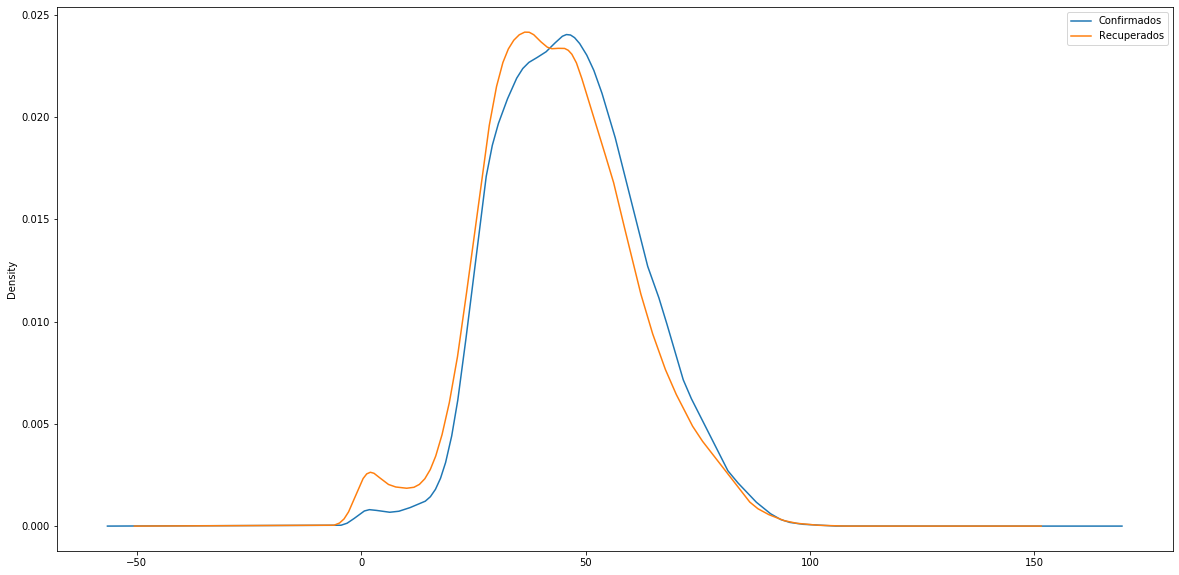

In [18]:
fig = plt.figure(figsize=(20,10))

for t_resultado in [1,3]:
    df.EDAD[df.RESULTADO == t_resultado].plot(kind='kde')
    
plt.legend(("Confirmados","Recuperados"))
plt.show()

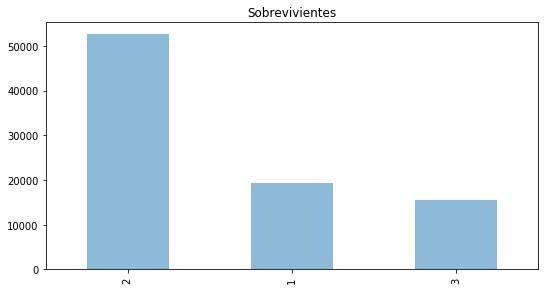

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
df.RESULTADO.value_counts().plot(kind='bar', alpha=0.5)
plt.title("Sobrevivientes")
plt.show()

In [37]:
df.groupby('FECHA_DEF').size()

FECHA_DEF
2020-01-15        1
2020-01-29        1
2020-02-10        1
2020-02-23        1
2020-03-04        1
2020-03-09        1
2020-03-16        2
2020-03-17        1
2020-03-18        3
2020-03-19        1
2020-03-20        1
2020-03-22        3
2020-03-23        2
2020-03-24        5
2020-03-25        4
2020-03-26       17
2020-03-27       20
2020-03-28       24
2020-03-29       22
2020-03-30       37
2020-03-31       55
2020-04-01       43
2020-04-02       51
2020-04-03       51
2020-04-04       57
2020-04-05       50
2020-04-06       75
2020-04-07       96
2020-04-08       71
2020-04-09       81
2020-04-10      105
2020-04-11      101
2020-04-12       95
2020-04-13       94
2020-04-14      114
2020-04-15      104
2020-04-16      107
2020-04-17       99
2020-04-18      101
2020-04-19      131
2020-04-20      131
2020-04-21      147
2020-04-22      134
2020-04-23      140
2020-04-24      140
2020-04-25      148
2020-04-26      134
2020-04-27      113
2020-04-28       99
2020-04-29

In [43]:
df[(df.ENTIDAD_RES == 25)]

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
79,2020-04-30,19e892,2,9,25,M,25,25,6,2,...,2,2,2,2,1,1,99,MÃ©xico,99,1
80,2020-04-30,08fa4b,1,4,25,H,25,25,1,1,...,2,2,2,2,99,2,99,MÃ©xico,99,97
91,2020-04-30,0c7755,2,12,25,H,25,25,12,1,...,2,2,2,2,1,2,99,MÃ©xico,99,97
137,2020-04-30,182e23,2,12,25,M,25,25,12,1,...,2,2,2,2,1,3,99,MÃ©xico,99,97
153,2020-04-30,174bb9,1,12,25,H,25,25,6,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86924,2020-04-30,04ad21,1,4,25,M,25,25,6,2,...,2,2,2,2,99,2,99,MÃ©xico,99,2
87072,2020-04-30,1bda92,2,4,25,H,25,25,15,2,...,2,2,2,1,99,3,99,MÃ©xico,99,2
87087,2020-04-30,006076,2,7,25,H,25,25,12,1,...,2,2,2,2,1,2,99,MÃ©xico,99,97
87257,2020-04-30,1260ea,2,6,25,M,25,25,1,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2


In [45]:
df.groupby('CARDIOVASCULAR').size()

CARDIOVASCULAR
1      2754
2     84226
98      392
dtype: int64

In [11]:
df.groupby('FECHA_DEF').size()


FECHA_DEF
2020-01-15        1
2020-01-29        1
2020-02-10        1
2020-02-23        1
2020-03-04        1
2020-03-09        1
2020-03-16        2
2020-03-17        1
2020-03-18        3
2020-03-19        1
2020-03-20        1
2020-03-22        3
2020-03-23        2
2020-03-24        5
2020-03-25        4
2020-03-26       17
2020-03-27       20
2020-03-28       25
2020-03-29       24
2020-03-30       38
2020-03-31       55
2020-04-01       43
2020-04-02       51
2020-04-03       51
2020-04-04       57
2020-04-05       51
2020-04-06       75
2020-04-07       96
2020-04-08       72
2020-04-09       85
2020-04-10      107
2020-04-11      101
2020-04-12       97
2020-04-13       96
2020-04-14      114
2020-04-15      109
2020-04-16      107
2020-04-17       99
2020-04-18      104
2020-04-19      133
2020-04-20      129
2020-04-21      145
2020-04-22      133
2020-04-23      137
2020-04-24      145
2020-04-25      159
2020-04-26      149
2020-04-27      126
2020-04-28      117
2020-04-29

In [12]:
print(df.FECHA_DEF.value_counts().sum()-92404)

3435


In [78]:
#buscamos los registros del estado con indice 25, en este caso es sinaloa

pd.crosstab(df.FECHA_DEF, df.ENTIDAD_RES[df.ENTIDAD_RES == 25])

ENTIDAD_RES,25
FECHA_DEF,
2020-03-26,1
2020-03-27,1
2020-03-28,1
2020-03-29,1
2020-03-31,1
2020-04-01,2
2020-04-02,4
2020-04-03,4
2020-04-04,6


In [14]:
#aqui buscamos los resultados de la entidad 25, correspondiete a sinaloa, y le restamos los casos donde no hay un sesgo (9999-99-99)
#que la estaremos manejando como nula
print(df.ENTIDAD_RES[df.ENTIDAD_RES == 2].count() - 2689)

1159


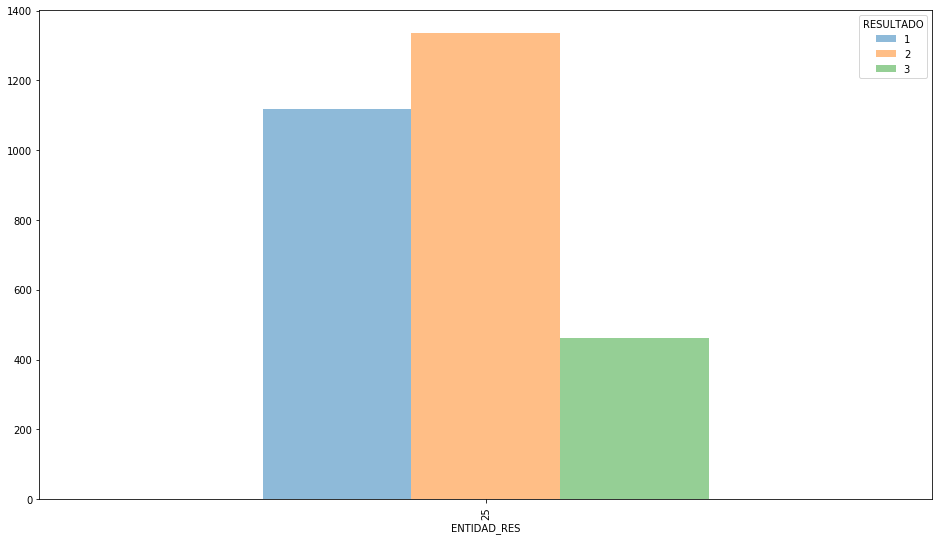

In [31]:
#En este bloque buscamos donde el estado responsable sea 25, en este caso estamos buscando los datos del estado de sinaloa
pd.crosstab(df.ENTIDAD_RES[df.ENTIDAD_RES == 25], df.RESULTADO).plot(kind='bar', alpha=0.5)

In [32]:
#buscamos los resultados donde el municipio sea el 1, en este caso estamos buscando donde el municipio es ahome
pd.crosstab(df.ENTIDAD_RES[df.MUNICIPIO_RES == 1][df.ENTIDAD_RES == 25], df.RESULTADO)

RESULTADO,1,2,3
ENTIDAD_RES,,,
25,140,189,87


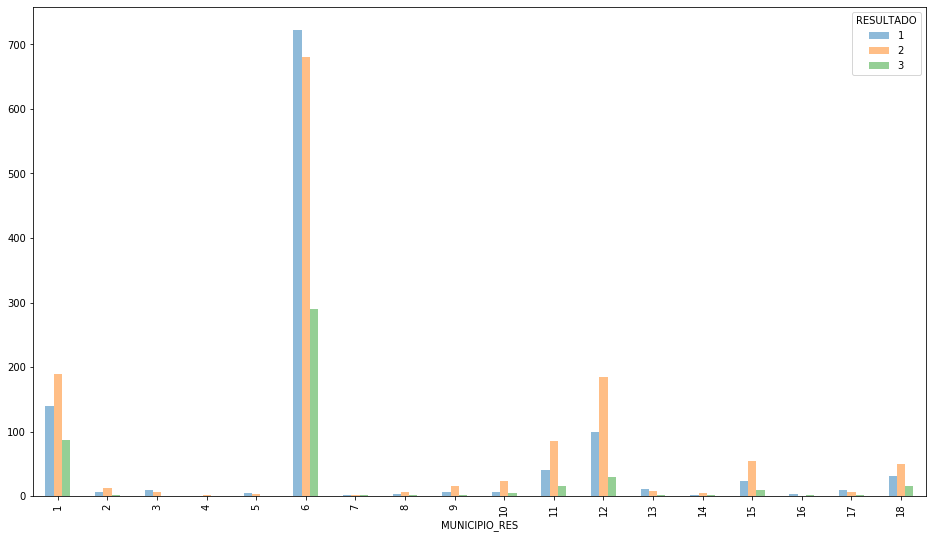

In [47]:
#Casos de covid en los 18 municipios del estado
#d = {1:'Ahome', 2:'Angostura', 3:'Badiraguato', 4:'Concordia', 5:'Cosala', 6:'Culiacan', 7:'Choix', 8:'Elota',9:'Escuinapa', 10:'El Fuerte', 11:'Guasave', 12:'Mazatlan', 13:'Mocortio', 14:'El Rosario', 15:'Salvador alvarado', 16:'San ignacio', 17:'Sinaloa', 18:'Navolato'}

pd.crosstab(df.MUNICIPIO_RES[df.ENTIDAD_RES == 25], df.RESULTADO).plot(kind='bar', alpha=0.5)